# 課題9 
配点
- Q1.1 2P
- Q1.2 5P
- Q1.3 3P

In [2]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot  as plt
%matplotlib inline

## Q1 ロジスティック回帰

In [ ]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2020A/master/ex8/iris.csv

irisデータセットの特徴量`petal_length`と`petal_width`で2つの花の種類`versicolor`か`virginica`のデータを散布図で可視化すると以下のように花ごとに`petal_length`と`petal_width`の特徴が異なることがわかります。

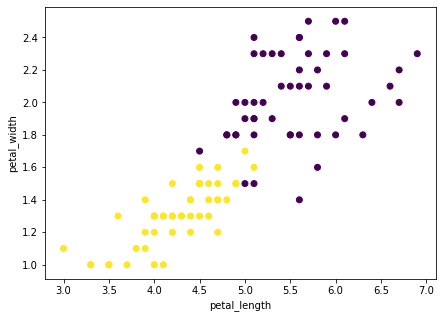

In [3]:
iris = pd.read_csv('iris.csv')
X=iris[(iris['species']=='versicolor')| (iris['species']=='virginica')][['petal_length', 'petal_width']].values
y=iris[(iris['species']=='versicolor')| (iris['species']=='virginica')][['species']].values
y = (y=='versicolor').astype(np.int) # versicolorを1、virginicaを0に

plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X[:,0], X[:,1], c=y[:,0]);

以下では、ロジスティック回帰により特徴量`petal_length`と`petal_width`から2つの花の種類`versicolor`か`virginica`を予測するような仮説関数のパラメータを学習することを考えます。

まず準備として、特徴量`petal_length`と`petal_width`を入力$X$, 花の種類`versicolor`か`virginica`を出力（ラベル）$y$とします。入力$X$は各特徴量ごとに標準化し、入力の各データにバイアス項($x_0=1$)を追加するため、入力の先頭列に1を要素とする列ベクトルを挿入します。これにより、入力$X$と出力$y$はデータ数を$m$としてそれぞれ行列（$m \times 3$) とベクトル($m \times 1$)になります。

In [4]:
X_norm=(X-np.mean(X, axis=0))/np.std(X, axis=0) # 標準化
X_norm = np.hstack([np.ones((X.shape[0],1)), X_norm]) # バイアス項の追加

## Q1.1 シグモイド関数
シグモイド関数$g(z)$は以下のように定義されます

$g(z)=\frac{1}{1+e^{-z}}$

引数に`NumPy`の実数値を要素とする任意の長さの配列を入力として受け取り、配列の各要素に対するシグモイド関数の値を要素とする配列を返す`sigmoid`関数を完成させてください。

[NumPyの指数関数](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

In [5]:
def sigmoid(Z):
    Z = Z.astype(np.float) # float型にしておく
    return ### 配列Zの各要素に対するシグモイド関数の値を計算しそれら要素とする配列を返すコード ###

`sigmoid`関数は入力の配列`[-1,0,1]`に対しては、配列`[0.26894142, 0.5, 0.73105858]`を返します。

In [6]:
sigmoid(np.array([-1,0,1]))

array([0.26894142, 0.5       , 0.73105858])

## Q1.2 コスト関数とパラメータの推定

以下では、最急降下法により、訓練データセットを元にロジスティック回帰の仮説関数のパラメータを学習する`graddes_logit`関数を実装します。

`graddes_logit`関数では第1引数に入力のデータ行列（データ数($m$)$\times$(特徴量+バイアス)($n$))、第2引数に入力の各データに対する出力（正解）のベクトル（$m\times1$）、第3引数に学習率、第4引数に学習の繰り返し（各繰り返しをエポックと呼ぶ）の回数を受け取ります。

これらの引数を元に、`graddes_logit`関数ではパラメータの学習を行い、以下を返します

- エポックごとのコスト関数の値を要素とするリスト
- 最終的なパラメータの値を要素とする配列（$n\times1$）を返します。


パラメータを$\theta=(\theta_0, \theta_1, ..., \theta_{n-1})^T$

仮説関数を$h(x)=g(\theta_0+\theta_1x_1+\theta_2x_2+....+\theta_{n-1}x_{n-1})=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$

入力を$
  X = \left(
    \begin{array}{cccc}
      x_0^{(1)} &   x_1^{(1)} & ... &   x_{n-1}^{(1)}  \\
      ... & ...& ...&...\\
      x_0^{(m)} &  x_1^{(m)} & ... &   x_{n-1}^{(m)}  \\
    \end{array}
  \right)
$ 

$X$において$x_0^{(i)}=1$

出力を$y=(y^{(1)}, y^{(2)}, ..., y^{(m)})^T$

とすると、ロジスティック回帰のコスト関数を以下のようにして

$J(\theta)=-\frac{1}{m}\Sigma_{i=1}^{m}(y^{(i)}log(h(x^{(i)}))+(1-y^{(i)})log(1-h(x^{(i)})))$

最急降下法では入力$X$の各特徴量$x_j$に対するパラメータ$\theta_j$を以下の様に更新していきます。

$\theta_j:= \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} =  \theta_j - \frac{\alpha}{m} \Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)}_j)$

パラメータ全体を以下のように一度に更新することもできます。

$\theta := \theta - \frac{\alpha}{m}X^T(g(X\theta)-y)$

入力が1特徴量（変数）の時は、バイアス項に対するパラメータを$\theta_0$、入力変数に対するパラメータを$\theta_1$としてパラメータは以下の様に更新されます。

$\theta_0 := \theta_0 - \frac{\alpha}{m}\Sigma_{i=1}^m (h(x^{(i)})-y^{(i)})$ 

$\theta_1 := \theta_1 - \frac{\alpha}{m}\Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)})$

具体的に、`graddes_logit`関数では以下の手順によりパラメータの学習を行います。

- 引数`n_iter`で指定されたエポックの回数だけ以下を繰り返す    

     - すべてのm個のデータについて以下を求める
        
        - 入力データ$x^{(i)}$について仮説関数$h(x^{(i)})$の値を求める
        
        - 出力$y^{(i)}$との誤差$h(x^{(i)})-y^{(i)}$の値を求める
    
 - すべてのm個のデータの誤差を用いてコスト関数$ J(\theta)$の値を求め、各エポックのコスト関数の値を要素とするリスト`costs`に追加
 
 - すべてのm個のデータの誤差を用いて各パラメータ$\theta_j (j=0,..,n-1)$を更新し、パラメータの値を要素とする配列`w`を更新
      - `w[0,0]`$:=$($x_0$に対するパラメータ$\theta_0$), 
      - ...,
      - `w[n-1,0]`$:=$($x_{n-1}$に対するパラメータ$\theta_{n-1}$)
        

 
 すべての繰り返しが終了したらリスト`costs`と配列`w`を返す。
 
 上記に従って、`graddes_logit`関数を完成させてください。

In [17]:
def graddes_logit(X, y, alpha, n_iter):  
    m = X.shape[0] # データ数
    n =  X.shape[1] # 次元（特徴量）数
    
    costs=[] # エポックごとのコスト関数の値を入れるリスト
    w = np.zeros((n,1)) #  バイアスと各特徴量に対するパラメータ（重み）の初期化
    
    for i in range(n_iter):
        ### コスト関数の計算とパラメータの更新をするコード ###
            # 課題8のgraddes関数と手続きは同じです
            # ロジスティック回帰では仮説関数h(x)がシグモイド関数になっていることに注意してください
            # ロジスティック回帰のコスト関数にすることに注意してください
        
    return costs, w

`graddes_logit`関数が完成したら以下のセルを実行して動作を確認してください。`graddes_logit`関数に訓練データセットを与え、学習率を0.1、学習のエポック数を100とした時の各エポックごとのコスト関数の値を示しています。パラメータの学習が進むにつれてコスト関数の値が減少していくことがわかります。この時の最終的なコスト関数の値は$\simeq 0.199$となります。

0.19912466287827385
[[-0.02318852]
 [-1.28885231]
 [-1.41169382]]


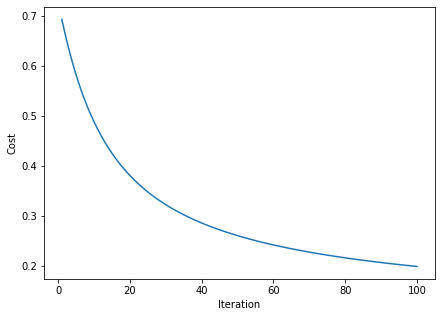

In [19]:
a=0.1 # 学習率
n=100 # 繰り返し回数
costs, w = graddes_logit(X_norm, y, a, n)
print(costs[-1])
print(w)
plt.figure(figsize=(7,5))
plt.plot(range(1,n+1),costs) # 繰り返しとコスト関数のプロット
plt.ylabel('Cost')
plt.xlabel('Iteration');

In [20]:
assert int(graddes_logit(X_norm, y, 0.1, 100)[0][-1]*1000)==199
assert int(graddes_logit(X_norm, y, 0.05, 100)[0][-1]*1000)==260

学習されたパラメータを元に、2つの特徴量、`petal_length`と`petal_width`、から2つの花の種類、`versicolor`か`virginica`、を分類するための決定境界を可視化してみます。

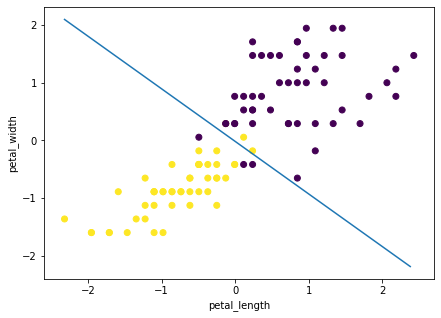

In [21]:
plt.figure(figsize=(7,5))
x1=np.arange(X_norm[:,1].min(),X_norm[:,1].max(),0.1)
plt.plot(x1, -(w[1,0]*x1+w[0,0])/w[2,0])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_norm[:,1], X_norm[:,2],c=y[:,0]);

2つの特徴量、`petal_length`($x_1$)と`petal_width`($x_2$)に対する、仮説関数$y=\frac{1}{1+e^{-(\theta_0+\theta_1x_1+\theta_2x_2)}}$（ロジスティック関数）は以下のようになります。以下の曲面で$y=0.5$となるところが上記の決定境界になっています。

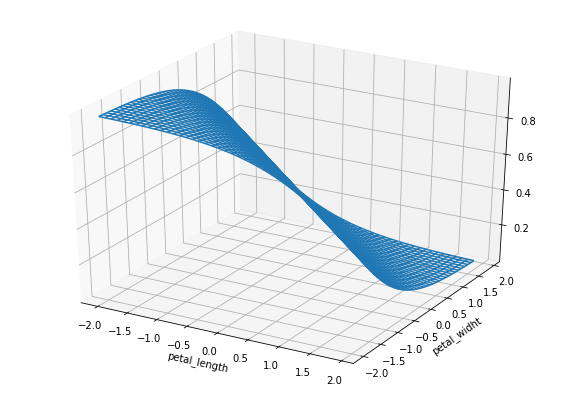

In [22]:
from mpl_toolkits.mplot3d import Axes3D

X1, X2 = np.meshgrid(np.arange(-2.0, 2.0, 0.1), np.arange(-2.0, 2.0, 0.1))
Z = sigmoid(w[0,0]+w[1,0]*X1+ w[2,0]*X2)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("petal_length")
ax.set_ylabel("petal_widht")
ax.plot_wireframe(X1, X2, Z);

## Q3 応用
タイタニック号の乗船者のデータを含むCSVファイル `'titanic.csv'` を `pandas` モジュールのデータフレームオブジェクトとしてロードし、乗船者の特徴量 （`Pclass`（客室の等級） と `Fare`（運賃）と`Age`（年齢）と`Sex`（性別）） からラベル `Survived` で表される乗客が生存したか（生存は`1`、非生存は`0`）を予測するモデルをロジスティック回帰を用いて学習してください。

In [ ]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2020A/master/ex9/titanic.csv

In [27]:
titanic = pd.read_csv('titanic.csv')
titanic[['Pclass','Fare','Age','Sex','Survived']].head()

,Pclass,Fare,Age,Sex,Survived
0,3,7.2500,22.0,male,0
1,1,71.2833,38.0,female,1
2,3,7.9250,26.0,female,1
3,1,53.1000,35.0,female,1
4,3,8.0500,35.0,male,0


In [29]:
gender = pd.get_dummies(titanic['Sex'])
df = pd.concat([titanic, gender], axis=1)
df[['Pclass','Fare','Age','female','male','Survived']].head()

,Pclass,Fare,Age,female,male,Survived
0,3,7.2500,22.0,0,1,0
1,1,71.2833,38.0,1,0,1
2,3,7.9250,26.0,1,0,1
3,1,53.1000,35.0,1,0,1
4,3,8.0500,35.0,0,1,0


0.4518540639177829
[[-0.64196449]
 [-1.0165919 ]
 [ 0.01801326]
 [-0.48111513]
 [ 0.61805293]
 [-0.61805293]]


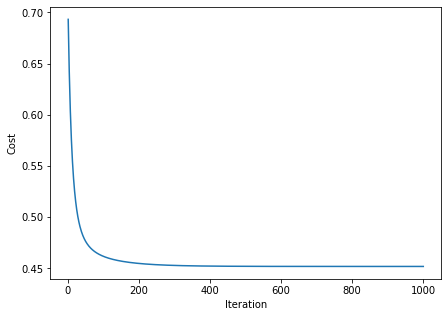

In [34]:
X = df[['Pclass','Fare','Age','female','male']].values
y = df[['Survived']].values

...